# 5220 Project - Predicting Chess Game Outcomes

Parker Lovin, Jacob Smith, Tristan Martin, and Caleb Smith

## Loading Libraries

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [158]:
games = pd.read_csv("games.csv")

In [159]:
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


Check for duplicates:

In [160]:
games[games.duplicated()]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
950,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
1794,x1Svcl0P,True,1.499820e+12,1.499830e+12,59,mate,white,10+0,kachess10204542,1171,quantummequanic,1432,c4 e5 Nc3 Nf6 Nf3 Nc6 g3 d5 cxd5 Nxd5 Bg2 Be6 ...,A29,English Opening: King's English Variation | F...,7
1830,wgIHzqDo,True,1.499710e+12,1.499710e+12,113,mate,white,10+0,quantummequanic,1403,barrow-wight,1364,e4 e6 e5 Bc5 d4 Be7 c3 Nh6 Bxh6 gxh6 Qd2 Bg5 f...,C00,French Defense: Steinitz Attack,3
2554,JrFxlGZo,False,1.489330e+12,1.489330e+12,78,mate,black,15+0,sp37578,1309,penguin100,1393,e4 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qc6 d3 Bf5 Qf3 Be...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4
2556,ezKACesj,False,1.488840e+12,1.488840e+12,51,mate,white,15+0,penguin100,1393,sp37578,1309,d4 d5 e3 Nf6 Nf3 b6 Nc3 Bb7 Bb5+ Nc6 Ne5 e6 O-...,D04,Queen's Pawn Game: Colle System,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,Uk0pZCRR,True,1.499532e+12,1.499541e+12,95,resign,black,45+45,kferapont,2094,moistvonlipwig,2228,e4 e5 Nf3 Nc6 Bb5 g6 d4 exd4 Bxc6 dxc6 Qxd4 Qx...,C60,Ruy Lopez: Fianchetto Defense,6
20014,ZhZm1ol9,True,1.498871e+12,1.498879e+12,109,draw,draw,45+45,moistvonlipwig,2229,mn8,2220,e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+...,C54,Italian Game: Classical Variation | Greco Gam...,17
20015,fpqjttDx,True,1.497663e+12,1.497664e+12,42,resign,black,7+30,waltersafarian,2162,moistvonlipwig,2214,d4 Nf6 c4 e6 Nf3 Bb4+ Bd2 a5 e3 O-O Bd3 b6 O-O...,E11,Bogo-Indian Defense: Wade-Smyslov Variation,8
20016,lzPgCJCS,True,1.497660e+12,1.497663e+12,102,resign,black,7+30,moistvonlipwig,2236,waltersafarian,2148,e4 g6 Nc3 Bg7 f4 c6 g3 d6 Bg2 e5 fxe5 dxe5 d3 ...,B06,Modern Defense,2


In [161]:
games.drop_duplicates(keep='first', inplace=True)
games.reset_index(inplace=True, drop=True)
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19624,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
19625,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
19626,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
19627,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [162]:
games[games.duplicated(subset=['id'], keep=False)].sort_values(by=['id'])

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
720,079kHDqh,True,1.504110e+12,1.504110e+12,32,resign,black,10+0,wiggleitjiggleit,1448,penguin_lo,1436,d4 d5 c4 Bf5 Nf3 e6 e3 Nc6 cxd5 Qxd5 Bd3 Bb4+ ...,D02,Queen's Gambit Refused: Baltic Defense,4
12092,079kHDqh,True,1.504113e+12,1.504113e+12,32,resign,black,10+0,wiggleitjiggleit,1448,penguin_lo,1436,d4 d5 c4 Bf5 Nf3 e6 e3 Nc6 cxd5 Qxd5 Bd3 Bb4+ ...,D02,Queen's Gambit Refused: Baltic Defense,4
18318,07e0uVvn,True,1.491955e+12,1.491955e+12,35,mate,white,30+0,chessguy9001,1259,helykopter33,1319,e4 e5 Nf3 Nf6 d3 Bc5 Nxe5 d6 Nc4 Bxf2+ Kxf2 Ng...,C42,Petrov's Defense,4
3867,07e0uVvn,True,1.491950e+12,1.491960e+12,35,mate,white,30+0,chessguy9001,1259,helykopter33,1319,e4 e5 Nf3 Nf6 d3 Bc5 Nxe5 d6 Nc4 Bxf2+ Kxf2 Ng...,C42,Petrov's Defense,4
17993,09fzI0ta,True,1.500985e+12,1.500986e+12,55,resign,white,10+0,artem555,1594,justello99,1608,d4 e6 c4 d5 cxd5 Qxd5 Nc3 Bb4 a3 Bxc3+ bxc3 Nf...,D30,Queen's Gambit Declined,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,zZK6BQrf,True,1.503990e+12,1.503990e+12,17,mate,white,10+0,bulletlover,1231,a_p_t_e_m_u_u,1295,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 Nxf7 Kx...,C57,Italian Game: Two Knights Defense | Fried Liv...,11
12214,zlQThGVX,True,1.501487e+12,1.501487e+12,61,resign,white,8+0,ducksandcats,1864,bobbytal,1842,e4 c5 Nf3 Nc6 Bb5 a6 Bc4 b5 Bd5 Bb7 Ne5 Nxe5 B...,B30,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,5
853,zlQThGVX,True,1.501490e+12,1.501490e+12,61,resign,white,8+0,ducksandcats,1864,bobbytal,1842,e4 c5 Nf3 Nc6 Bb5 a6 Bc4 b5 Bd5 Bb7 Ne5 Nxe5 B...,B30,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,5
15042,zyBR4G1i,True,1.490664e+12,1.490664e+12,20,resign,black,15+0,axmn312,1196,dragonstar1738,1348,d4 d5 c4 dxc4 e3 Bf5 Bxc4 Nc6 Nf3 Nb4 Na3 e6 B...,D20,Queen's Gambit Accepted: Old Variation,5


Even after using the drop_duplicates() method, there still appear to be some rows with duplicate ID's.

In [163]:
games[games.duplicated(subset=['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id',	'white_rating',	'black_id',	'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'], keep=False)].sort_values(by=['id'])

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
720,079kHDqh,True,1.504110e+12,1.504110e+12,32,resign,black,10+0,wiggleitjiggleit,1448,penguin_lo,1436,d4 d5 c4 Bf5 Nf3 e6 e3 Nc6 cxd5 Qxd5 Bd3 Bb4+ ...,D02,Queen's Gambit Refused: Baltic Defense,4
12092,079kHDqh,True,1.504113e+12,1.504113e+12,32,resign,black,10+0,wiggleitjiggleit,1448,penguin_lo,1436,d4 d5 c4 Bf5 Nf3 e6 e3 Nc6 cxd5 Qxd5 Bd3 Bb4+ ...,D02,Queen's Gambit Refused: Baltic Defense,4
18318,07e0uVvn,True,1.491955e+12,1.491955e+12,35,mate,white,30+0,chessguy9001,1259,helykopter33,1319,e4 e5 Nf3 Nf6 d3 Bc5 Nxe5 d6 Nc4 Bxf2+ Kxf2 Ng...,C42,Petrov's Defense,4
3867,07e0uVvn,True,1.491950e+12,1.491960e+12,35,mate,white,30+0,chessguy9001,1259,helykopter33,1319,e4 e5 Nf3 Nf6 d3 Bc5 Nxe5 d6 Nc4 Bxf2+ Kxf2 Ng...,C42,Petrov's Defense,4
17993,09fzI0ta,True,1.500985e+12,1.500986e+12,55,resign,white,10+0,artem555,1594,justello99,1608,d4 e6 c4 d5 cxd5 Qxd5 Nc3 Bb4 a3 Bxc3+ bxc3 Nf...,D30,Queen's Gambit Declined,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,zZK6BQrf,True,1.503990e+12,1.503990e+12,17,mate,white,10+0,bulletlover,1231,a_p_t_e_m_u_u,1295,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 Nxf7 Kx...,C57,Italian Game: Two Knights Defense | Fried Liv...,11
12214,zlQThGVX,True,1.501487e+12,1.501487e+12,61,resign,white,8+0,ducksandcats,1864,bobbytal,1842,e4 c5 Nf3 Nc6 Bb5 a6 Bc4 b5 Bd5 Bb7 Ne5 Nxe5 B...,B30,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,5
853,zlQThGVX,True,1.501490e+12,1.501490e+12,61,resign,white,8+0,ducksandcats,1864,bobbytal,1842,e4 c5 Nf3 Nc6 Bb5 a6 Bc4 b5 Bd5 Bb7 Ne5 Nxe5 B...,B30,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,5
15042,zyBR4G1i,True,1.490664e+12,1.490664e+12,20,resign,black,15+0,axmn312,1196,dragonstar1738,1348,d4 d5 c4 dxc4 e3 Bf5 Bxc4 Nc6 Nf3 Nb4 Na3 e6 B...,D20,Queen's Gambit Accepted: Old Variation,5


When checking for duplicates based on a subset of the columns, it appears the remaining duplicates only differ on the columns 'created_at' (start time) and 'last_move_at' (end time).  Intuition and a quick glance at the data suggest that these duplicates are in fact the same games, and that the differences with the 'created_at' and 'last_move_at' columns are due to differences in rounding or some other numerical issue.  Because the duplicate rows match on important attributes like 'moves' and our target 'winner', we can keep one of each duplicate (otherwise, we may have needed to drop all duplicate rows without keeping one of each in order to reduce noise).

In [164]:
games.drop_duplicates(subset=['id'], keep='first', inplace=True)
games.reset_index(inplace=True, drop=True)
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
19109,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
19110,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
19111,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [165]:
games[games.duplicated(subset=['id'], keep=False)]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply


Our dataset is now completely free of duplicate games.

In [166]:
type(games['moves'][0])

str

In [167]:
games['moves'][0].split(' ')[0]

'd4'

In [168]:
print(games['moves'][0].split(' ')[0:10])
type(games['moves'][0].split(' '))

['d4', 'd5', 'c4', 'c6', 'cxd5', 'e6', 'dxe6', 'fxe6', 'Nf3', 'Bb4+']


list

Each entry in the 'moves' column is a string where each ply appears to be separated by a whitespace, so changing these strings into lists that can be easily indexed is a simple matter of using the split method.  (A 'ply' is an individual player's action during a turn, in contrast to a 'move', which refers to when both players have taken their action.  Therefore, every two entries in an instance of the 'moves' columns constitutes an actual 'move'.)

In [169]:
# games.head(5)

In [170]:
balance = games.groupby('winner').size()
balance = pd.DataFrame(balance)
balance.rename(columns={0: 'count'}, inplace=True)
balance.reset_index(inplace=True)
balance

,winner,count
0,black,8680
1,draw,888
2,white,9545


<BarContainer object of 3 artists>

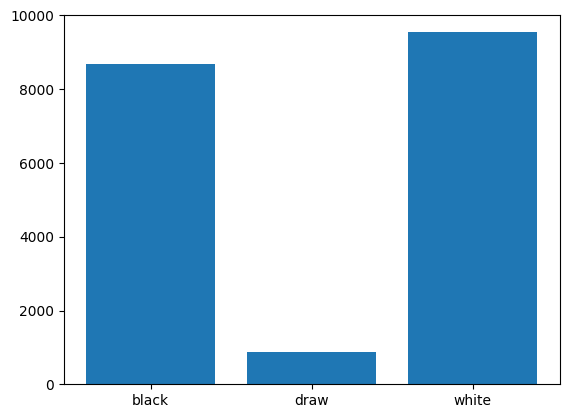

In [171]:
plt.bar(x=balance['winner'], height=balance['count'])

We can see that the data set strikes a good balance between the black and white categories, with an approximate 9:10 ratio.  However, there are far fewer data points in the "draw" category (about one-tenth of the number of data points in each of the other two categories).  For our initial models, we are going to ignore the games that ended in a draw.  This will allow us to use 0.5 (the same as predicting the outcome with a coin flip) as a point of reference for how successful our models are.

In [172]:
# Save copy of original dataframe before manipulating it
games_original = games

games = games[games['winner'] != 'draw']
games.reset_index(inplace=True)
games = games.drop(columns=['index'])
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
18221,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
18222,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
18223,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


<BarContainer object of 2 artists>

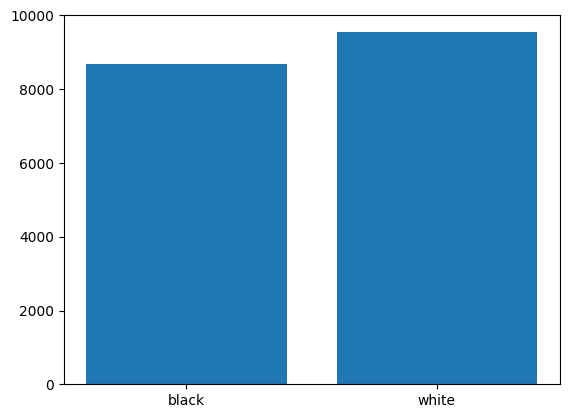

In [173]:
balance = games.groupby('winner').size()
balance = pd.DataFrame(balance)
balance.rename(columns={0: 'count'}, inplace=True)
balance.reset_index(inplace=True)
plt.bar(x=balance['winner'], height=balance['count'])

Maximum number of moves in an opening (in this data): 28
Minimum number of moves in an opening (in this data): 1
Average number of moves in an opening (in this data): 4.801262002743484


Percentage of games with opening length of 5 ply or less: 67.82%




(array([6.861e+03, 7.333e+03, 2.848e+03, 7.660e+02, 2.840e+02, 1.000e+02,
        2.000e+01, 8.000e+00, 1.000e+00, 4.000e+00]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

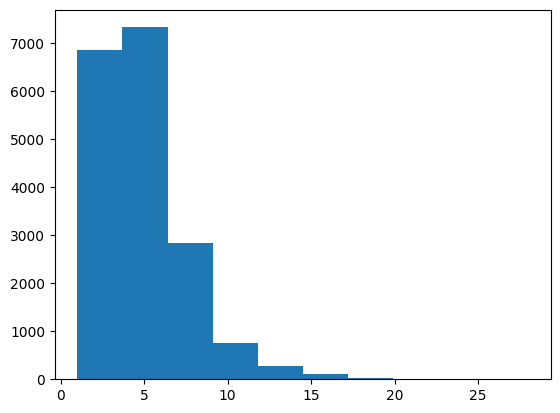

In [174]:
print(f"Maximum number of moves in an opening (in this data): {games['opening_ply'].max()}")
print(f"Minimum number of moves in an opening (in this data): {games['opening_ply'].min()}")
print(f"Average number of moves in an opening (in this data): {games['opening_ply'].mean()}")
print('\n')
print(f"Percentage of games with opening length of 5 ply or less: {round(len(games[games['opening_ply'] <= 5].index) / len(games.index) * 100, 2)}%")
print('\n')
plt.hist(games['opening_ply'])

The above histogram shows the distribution of opening lengths (number of ply in the opening of a particular game).  The distribution is right-skewed, and the majority of games (about 68%) have 5 ply or less in their opening.

In [175]:
import numpy as np

In [176]:
# placeholder = np.arange(18225, dtype=int)
# games['moves_list'] = np.full_like(placeholder, 1)
# for i in range(games.shape[0]):
#   games.loc[i, 'moves_list'] = games.loc[i, 'moves'].split(' ')
# print(games)

games['moves_list'] = [games.loc[i, 'moves'].split(' ') for i in range(games.shape[0])]

In [177]:
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,moves_list
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb..."
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx..."
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4..."
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,"[d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6..."
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,"[e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,"[d4, f5, e3, e6, Nf3, Nf6, Nc3, b6, Be2, Bb7, ..."
18221,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,"[d4, d6, Bf4, e5, Bg3, Nf6, e3, exd4, exd4, d5..."
18222,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,"[d4, d5, Bf4, Nc6, e3, Nf6, c3, e6, Nf3, Be7, ..."
18223,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,"[e4, d6, d4, Nf6, e5, dxe5, dxe5, Qxd1+, Kxd1,..."


In [178]:
len(games['moves_list'][18224])

78

In [179]:
games['num_moves'] = 0
print(games['num_moves'])
for i in range(0, len(games['moves_list'])):
  games.loc[i, 'num_moves'] = len(games.loc[i, 'moves_list'])

# games
print(games.loc[0, 'moves'])

0        0
1        0
2        0
3        0
4        0
        ..
18220    0
18221    0
18222    0
18223    0
18224    0
Name: num_moves, Length: 18225, dtype: int64
d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4


In [180]:
print(games.loc[0, 'num_moves'])

13


In [181]:
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,moves_list,num_moves
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...",13
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...",16
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...",61
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,"[d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6...",61
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,"[e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N...",95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,"[d4, f5, e3, e6, Nf3, Nf6, Nc3, b6, Be2, Bb7, ...",24
18221,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,"[d4, d6, Bf4, e5, Bg3, Nf6, e3, exd4, exd4, d5...",82
18222,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,"[d4, d5, Bf4, Nc6, e3, Nf6, c3, e6, Nf3, Be7, ...",35
18223,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,"[e4, d6, d4, Nf6, e5, dxe5, dxe5, Qxd1+, Kxd1,...",109


For our initial modeling, we are going to use the first 20 moves of a game as our predictor for who will win.  Because the 'moves' column is actually a list of the ply, we will use 40 "moves" (ply) as our predictor.  As such, we will only include games with greater than 40 "moves" in the data that we use for modeling, as we do not want the final move of the game to be included as a predictor of the outcome.  We will, however, need to make sure that excluding games with 40 moves or less does not eliminate too much data:

In [182]:
games[games['num_moves'] > 40].shape[0]

12752

In [183]:
# IMPORTANT: Replace 'num_moves' columns with 'turns' column (if it is found that they are the same)

games2 = games[games['num_moves'] > 40]
games2.reset_index(inplace=True, drop=True)
games2

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,moves_list,num_moves
0,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...",61
1,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,"[d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6...",61
2,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,"[e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N...",95
3,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6,"[e4, e5, Bc4, Nc6, Nf3, Nd4, d3, Nxf3+, Qxf3, ...",66
4,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4,"[e4, d5, exd5, Qxd5, Nc3, Qe5+, Be2, Na6, d4, ...",119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12747,7IENcPg3,True,1.499815e+12,1.499815e+12,43,mate,white,10+0,jkubb29,1328,jamboger,1252,e4 e6 Nf3 d5 Nc3 Bb4 exd5 exd5 d4 Bg4 a3 Bxc3+...,C00,French Defense: Two Knights Variation,5,"[e4, e6, Nf3, d5, Nc3, Bb4, exd5, exd5, d4, Bg...",43
12748,uMzb0TPC,True,1.499812e+12,1.499813e+12,58,mate,black,10+10,samael88,1237,jamboger,1231,e4 e6 Nf3 d5 Bb5+ Bd7 c4 c6 Ba4 Qa5 b3 b5 cxb5...,C00,French Defense: Knight Variation,3,"[e4, e6, Nf3, d5, Bb5+, Bd7, c4, c6, Ba4, Qa5,...",58
12749,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,"[d4, d6, Bf4, e5, Bg3, Nf6, e3, exd4, exd4, d5...",82
12750,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,"[e4, d6, d4, Nf6, e5, dxe5, dxe5, Qxd1+, Kxd1,...",109


In [184]:
games2.groupby('white_id').size()
print(games2.value_counts("winner"))
games_w = pd.DataFrame(games2[games2['winner'] == 'white'].groupby('white_id').size())
games_w.reset_index(inplace=True)
games_w

winner
white    6538
black    6214
Name: count, dtype: int64


,white_id,0
0,-l-_jedi_knight_-l-,2
1,-pavel-,1
2,1063314,1
3,1240100948,19
4,12ss34,1
...,...,...
3892,zugzwang13,1
3893,zvonimir1932,1
3894,zx10r,1
3895,zynko,4


In [185]:
print(games2.value_counts("winner"))
games_b = pd.DataFrame(games2[games2['winner'] == 'black'].groupby('black_id').size())
games_b.reset_index(inplace=True)
games_b

winner
white    6538
black    6214
Name: count, dtype: int64


,black_id,0
0,-l-_jedi_knight_-l-,3
1,1063314,1
2,1111112222,1
3,1240100948,2
4,2700172,1
...,...,...
3682,zygot,1
3683,zz12345,1
3684,zzblesk,1
3685,zzhdan,1


In [186]:
games_total = games_w.merge(games_b, left_on='white_id', right_on='black_id')
games_total

,white_id,0_x,black_id,0_y
0,-l-_jedi_knight_-l-,2,-l-_jedi_knight_-l-,3
1,1063314,1,1063314,1
2,1240100948,19,1240100948,2
3,2700172,1,2700172,1
4,a_p_t_e_m_u_u,4,a_p_t_e_m_u_u,6
...,...,...,...,...
1047,zmey65,1,zmey65,1
1048,zoro94,2,zoro94,2
1049,zsisk22,3,zsisk22,2
1050,zubejan,1,zubejan,1


In [187]:
games_total['wins'] = games_total['0_x'] + games_total['0_y']
games_total

,white_id,0_x,black_id,0_y,wins
0,-l-_jedi_knight_-l-,2,-l-_jedi_knight_-l-,3,5
1,1063314,1,1063314,1,2
2,1240100948,19,1240100948,2,21
3,2700172,1,2700172,1,2
4,a_p_t_e_m_u_u,4,a_p_t_e_m_u_u,6,10
...,...,...,...,...,...
1047,zmey65,1,zmey65,1,2
1048,zoro94,2,zoro94,2,4
1049,zsisk22,3,zsisk22,2,5
1050,zubejan,1,zubejan,1,2


In [188]:
games_total['player_id'] = games_total['white_id']
games_total

,white_id,0_x,black_id,0_y,wins,player_id
0,-l-_jedi_knight_-l-,2,-l-_jedi_knight_-l-,3,5,-l-_jedi_knight_-l-
1,1063314,1,1063314,1,2,1063314
2,1240100948,19,1240100948,2,21,1240100948
3,2700172,1,2700172,1,2,2700172
4,a_p_t_e_m_u_u,4,a_p_t_e_m_u_u,6,10,a_p_t_e_m_u_u
...,...,...,...,...,...,...
1047,zmey65,1,zmey65,1,2,zmey65
1048,zoro94,2,zoro94,2,4,zoro94
1049,zsisk22,3,zsisk22,2,5,zsisk22
1050,zubejan,1,zubejan,1,2,zubejan


In [189]:
players = games_total

In [190]:
players.drop(columns=['white_id', '0_x', 'black_id', '0_y'], inplace=True)
players

,wins,player_id
0,5,-l-_jedi_knight_-l-
1,2,1063314
2,21,1240100948
3,2,2700172
4,10,a_p_t_e_m_u_u
...,...,...
1047,2,zmey65
1048,4,zoro94
1049,5,zsisk22
1050,2,zubejan


In [191]:
games.groupby('opening_name').size()

,0
opening_name,
Alekhine Defense,41
Alekhine Defense #2,2
Alekhine Defense #3,1
Alekhine Defense: Balogh Variation,1
Alekhine Defense: Brooklyn Variation,2
...,...
Zukertort Opening: Slav Invitation,9
Zukertort Opening: Tennison Gambit,37
Zukertort Opening: The Walrus,1


In [192]:
games[(games['opening_name'] == 'Alekhine Defense') & (games['winner'] == 'white')].shape[0]

21

In [193]:
games[(games['opening_name'] == 'Zukertort Opening: Tennison Gambit') & (games['winner'] == 'white')].shape[0]

22

In [194]:
games[(games['opening_name'] == 'Zukertort Opening: Tennison Gambit') & (games['winner'] == 'black')].shape[0]

15

In [195]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# x = games['moves']
# y = games['winner']

# print(x)
# print(y)

In [196]:
# !pip install -U sentence-transformers

In [197]:
# from sentence_transformers import SentenceTransformer
# sentences = x.to_list()

# model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# embeddings = model.encode(sentences)
# print(embeddings)